## Homework Week 3 


From Week 3, please submit your homework to iCollege -> assignment -> find your TA's folder -> sub folder of week 3.

<p style="text-align:left;color:red;font-weight:bold;font-size:14pt;padding-bottom:20px">Deadline: Sep 19th 2020 11:59PM

## Please change this Jupyter Notebook title with your first name and last name before you submit your homework. No initials please! For example, HW3-Jingjing-Cannon 


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. Find the best cureve that fits the data points from the equation below, with the best fit coeffints ([w]) and interception(b). 
$$
\begin{equation}
y = -0.5 + 2.2 \times x + 0.3 \times x^3+ 2 \times N
\end{equation}
$$
               N = 100 random numbers that follow normal distribution 
               x = 100 numbers evenly spaced between (-5,5)

    Print your coefficeint(s) and intercept.

    Plot a smooth predicted line from your fitted model together with the observed data points from the equation above, the line and the points should be in different colors.
    
    Hint: 2 X N is introducing some tiny noise into the data.

In [38]:
N = np.random.normal(0,1,100)
X = np.random.uniform(-5,5,100)
Y = -.5 + (2.2 * X) + (.3 * (X**3)) + (2 * N)

In [44]:
evenSpace = range(-5,5)

In [39]:
polynomialCoefficients = np.polyfit(X,Y,3)

In [48]:
polynomialCoefficients

array([ 0.30693195,  0.00504994,  2.14448183, -1.08265646])

In [40]:
fit = np.poly1d(polynomialCoefficients)

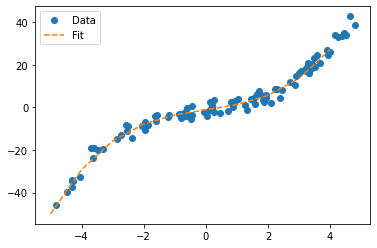

In [47]:
plt.plot(data['X'],data['Y'],"o",label='Data')
plt.plot(evenSpace,fit(evenSpace),'--',label='Fit')
plt.legend()
plt.show()

2. Create a $10\times 4$ dataframe with random numbers that follows normal distribution. You can use any labels for index and column names. Check the first row, print all the column(s) where the values in the first row is greater than 0.

In [50]:
TenByFour = pd.DataFrame(np.random.normal(10,2,size=(10,4)),columns=['A','B','C','D'])

In [51]:
TenByFour

,A,B,C,D
0,10.950280,11.385577,15.364059,12.153965
1,11.227157,10.545507,8.414337,11.006798
2,9.541910,10.252236,12.387192,8.981378
3,12.786618,10.789467,8.961368,10.771670
4,13.848894,11.791855,9.046290,9.250018
5,7.201113,8.503144,11.914914,11.935936
6,7.578556,9.423916,10.731192,7.109641
7,12.576024,9.833254,11.736933,10.752108
8,5.953674,9.403871,12.059551,11.980923
9,11.954480,8.933377,8.029541,9.458079


3. Create a dataframe that the index is the first date of each month in 2019, and the coloumn names are five students: Amy, Chris, Larry, Nancy and Zach. The values in the dataframe random integer values between 0 and 100. Show all values of Chris and Nancy for April to July 2019.

In [78]:
dateRange = pd.date_range('2019-01-01',periods=12, freq='MS')

In [79]:
data = {
    'DateIndex': dateRange,
    'Amy': np.random.randint(100, size = 12),
    'Chris': np.random.randint(100, size =12),
    'Larry': np.random.randint(100, size =12),
    'Nancy': np.random.randint(100, size =12),
    'Zach': np.random.randint(100, size =12)
}

In [80]:
dateDataFrame = pd.DataFrame(data)

In [81]:
dateDataFrame.head()

,DateIndex,Amy,Chris,Larry,Nancy,Zach
0,2019-01-01,42,99,28,75,2
1,2019-02-01,58,1,50,61,33
2,2019-03-01,75,55,39,95,70
3,2019-04-01,93,20,43,30,66
4,2019-05-01,5,43,16,11,7


In [82]:
selected_dates = dateDataFrame[(dateDataFrame['DateIndex'] > '2019-03-31') & (dateDataFrame['DateIndex'] < '2019-08-01')]

In [83]:
chris_nancy_selected_dates = selected_dates[['DateIndex','Chris','Nancy']]

In [84]:
chris_nancy_selected_dates

,DateIndex,Chris,Nancy
3,2019-04-01,20,30
4,2019-05-01,43,11
5,2019-06-01,18,48
6,2019-07-01,62,61


4. Use the same dataframe from 3,Display all rows of the dataframe where Amy > Zach.

In [87]:
AmyZachDataFrame = dateDataFrame[['DateIndex','Amy','Zach']]

In [88]:
AmyGreaterThanZach = AmyZachDataFrame[AmyZachDataFrame['Amy'] > AmyZachDataFrame['Zach']]

In [89]:
AmyGreaterThanZach

,DateIndex,Amy,Zach
0,2019-01-01,42,2
1,2019-02-01,58,33
2,2019-03-01,75,70
3,2019-04-01,93,66
5,2019-06-01,32,11
7,2019-08-01,51,41


5. Import the attached excel sheet named 'Employees.xls' and make another dataframe to show: under each manager ID, for each job title, what the total leave hours are. If the leave hour is Nan, replace it with a 0. Save the new table into a new excel sheet called 'LeaveHours_by_manger_and_job.xls'. You dont need to show your folder in your submission but only need to show the code for saving the file in the last step.

    Hint: each distinct Manager ID should be a column name.

In [100]:
employeeDataFrame = pd.read_excel('Employees.xls')

In [110]:
employeeDataFrame['SickLeaveHours'] = employeeDataFrame['SickLeaveHours'].fillna(0)

In [111]:
LeaveHours_by_manager_and_job = employeeDataFrame.groupby(['ManagerID','JobTitle']).agg({'SickLeaveHours':sum})

In [113]:
LeaveHours_by_manager_and_job.to_excel('LeaveHours_by_manger_and_job.xls')